# Binary Symetric Channel and Repetition Codes

## Import image and Libraries

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

import math
import numpy as np
from numpy import asarray

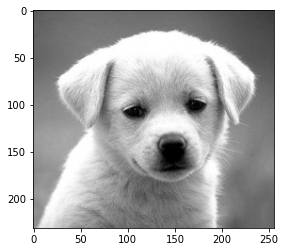

The shape of the image is: (231, 256)


In [17]:
im = Image.open(r"C:\Users\preet\Desktop\image_six.jpg")
im.thumbnail((256, 256))
im = im.convert("L")
jello = plt.imshow(im,cmap = 'gray')
plt.show()

data = asarray(im)
n_H, n_W = data.shape

print("The shape of the image is: " + str(data.shape))


## Create repetition image

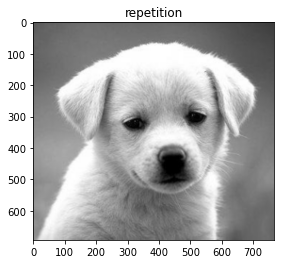

In [18]:
Z = np.zeros((n_H*3,n_W*3))

h_Z = 0
w_Z = 0
pixel_num =0

for h in range(n_H):
    for w in range(n_W):
        point = data[h][w]
        section = np.array([[point, point, point], [point, point, point], [point, point, point]])
        Z[h_Z:h_Z+3, w_Z:w_Z+3] = section
        w_Z += 3
    h_Z  += 3
    w_Z = 0

new  = Image.fromarray(Z)
jello = plt.imshow(new)
plt.title("repetition")
plt.show()
        
    


## Create the noise channel

In [19]:
prob = [0.9,0.1]

z_h, z_w = Z.shape

for h in range(z_h):
    for w in range(z_w):
        noise = np.random.choice(prob,p=[0.9,0.1])
        if noise == 0.1:
            pixel = Z[h][w]
            Z[h][w] = 255 - pixel

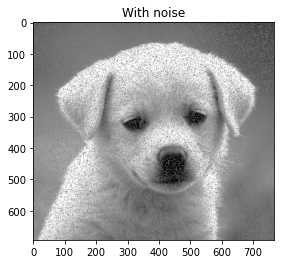

In [20]:
new  = Image.fromarray(Z)
jello = plt.imshow(new)
plt.title("With noise")
plt.show()
        

## Apply the decoding mechanism


In [21]:
OUT = np.zeros((n_H,n_W))

h_Z = 0
w_Z = 0

for h in range(n_H):
    vert_start = h_Z
    vert_end = h_Z + 3
    for w in range(n_W):
        horiz_start = w_Z
        horiz_end = w_Z + 3
        
        section = Z[vert_start:vert_end, horiz_start:horiz_end]
        
        values, counts = np.unique(section, return_counts=True)
        max_num = np.max(counts)
        index = np.where(counts == max_num)[0][0]
        max_value = values[index]        
        OUT[h][w] = max_value
        
        w_Z += 3
    h_Z += 3
    w_Z = 0
        
        

## Recreation of image:

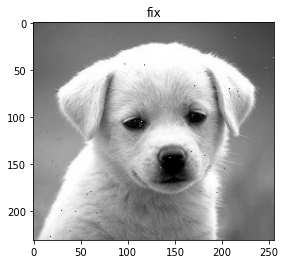

In [22]:
new  = Image.fromarray(OUT)
jello = plt.imshow(new)
plt.title("fix")
plt.show()
        